## Assignment 4.2

### Exercises 3 - 1, 3 - 2, 4 - 1, and 4 - 2

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [74]:
# Imports
import nsfg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from empiricaldist import Pmf
from empiricaldist import Cdf

## Exercise 3 - 1

*Something like the class size paradox appears if you survey children and ask how many children are in their family. 
Families with many children are more likely to appear in your sample, and families with no children have no change to be in
the sample.*

In [10]:
# Read the Response Female Dataset
resp = nsfg.ReadFemResp()
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


*Use the NSFG respondent variable NUMKDHH to construct the actual distribution from the number of children under 18 in 
the household*

In [12]:
numOfChildren_counts = resp.numkdhh.value_counts()

# convert value_counts to df and assign new names to the columns
numOfChildren_counts = pd.DataFrame(numOfChildren_counts)
numOfChildren_counts = numOfChildren_counts.reset_index()
numOfChildren_counts.columns = ['Number of Children', 'Total Count']
numOfChildren_counts

,Number of Children,Total Count
0,0,3563
1,1,1636
2,2,1500
3,3,666
4,4,196
5,5,82


In [13]:
numOfChildren_pmf = Pmf.from_seq(resp.numkdhh)
numOfChildren_pmf

,probs
0,0.466178
1,0.214052
2,0.196258
3,0.087139
4,0.025644
5,0.010729


*Now compute the biased distribution we would see if we surveyed the children abd asked them how many
children under 18 (including themselves) are in their households*

In [17]:
def BiasPmf(pmf):
    newPmf = pmf.copy()
    
    for x, p in newPmf.items():
        newPmf[x] = newPmf.get(x, 0) * x
        
    Pmf.from_seq(newPmf)
    
    return newPmf

biasedNumOfChildren_pmf = BiasPmf(numOfChildren_pmf)
biasedNumOfChildren_pmf

,probs
0,0.000000
1,0.214052
2,0.392516
3,0.261416
4,0.102578
5,0.053644


*Plot the actual and biased distributions, and compute their means.*

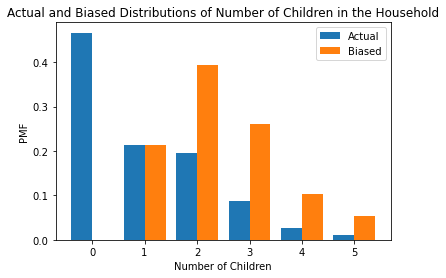

In [41]:
numOfChildren_quantities = numOfChildren_pmf.qs

x_axis = np.arange(len(numOfChildren_quantities))

plt.bar(x_axis - 0.2, numOfChildren_pmf, width = 0.4, label = 'Actual')
plt.bar(x_axis + 0.2, biasedNumOfChildren_pmf, width = 0.4, label = 'Biased')

plt.xticks(x_axis, numOfChildren_quantities)

plt.xlabel('Number of Children')
plt.ylabel('PMF')
plt.title('Actual and Biased Distributions of Number of Children in the Household')

plt.legend()

plt.show()

In [42]:
# mean
print(f'Actual Number of Children Mean: {numOfChildren_pmf.mean()}')

Actual Number of Children Mean: 1.024205155043831


In [24]:
# mean
print(f'Biased Number of Children Mean: {biasedNumOfChildren_pmf.mean()}')

Biased Number of Children Mean: 2.461860525971477


The actual number of children in the household shows less larger families than the biased distribution.
As stated families with no children wouldnt show up in the biased dustribution as there would be no
one to ask how many kids were in the family.

## Exercise 3 - 2

*Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance.*

In [46]:
def PmfMean(pmf):
    '''
    Computes the mean of a PMF
    
    args:
        pmf (object)
        
    returns:
        mean (float)
    '''
    mean = sum(p * x for x, p in pmf.items())
    
    return mean

In [47]:
def PmfVar(pmf):
    '''
    Computes the variance of a PMF
    
    args:
        pmf (object)
        
    returns:
        var (float)
    '''
    meanPmf = PmfMean(pmf)
    
    var = sum( (p * (x - meanPmf) ** 2) for x, p in pmf.items())
    
    return var

*To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf*

In [50]:
# Actual
meanFunction_actual = PmfMean(numOfChildren_pmf)
meanMethod_actual = numOfChildren_pmf.mean()

if meanFunction_actual == meanMethod_actual:
    print("Function equals method")
else:
    print("Function NOT equals method")

Function equals method


In [51]:
# Biased
meanFunction_actual = PmfMean(biasedNumOfChildren_pmf)
meanMethod_actual = biasedNumOfChildren_pmf.mean()

if meanFunction_actual == meanMethod_actual:
    print("Function equals method")
else:
    print("Function NOT equals method")

Function equals method


## Exercise 4 - 1

*How much did you weigh at birth? Using the NSFG data (all live births), compute the distribution of birth weights
and use it to find your percentile rank.*

In [53]:
# Read Female Pregnancy Dataset
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [69]:
def PercentileRank(weights, myWeight):
    '''
    Computes the Percentile Rank
    
    args:
        weights (list)
        myWeight (float)
        
    returns:
        rank (int)
    '''
    count = 0
    numWeights = len(weights)
    
    for weight in weights:
        if weight <= myWeight:
            count += 1
            
    rank = 100 * (count / numWeights)
    
    return rank

In [70]:
# Weights of firstborns
weightFirstBorns = preg[preg.birthord == 1]
weightFirstBorns['totalwgt_lb']

0        8.8125
2        9.1250
5        8.5625
8        7.5625
10       7.8125
          ...  
13576    6.4375
13578    6.0000
13581    6.3750
13584    6.3750
13588    6.1875
Name: totalwgt_lb, Length: 4413, dtype: float64

In [73]:
# get percentile rank for my weight = 5.7lbs
myRank = PercentileRank(weightFirstBorns['totalwgt_lb'], 5.6)
myRank

9.67595739859506

For my birth weight of 5.6 lbs, I am only in the 9th percentile meaning I was very small!

## Exercise 4 - 2

*The numbers generated by random.random are supposed to be uniform between 0 and 1: that is, every value in the
range should have the same probability*

In [76]:
thousandNumbers = np.random.random(1000)
thousandNumbers

array([3.13936605e-01, 2.27088567e-01, 5.36312748e-01, 2.93222985e-01,
       5.49372510e-02, 7.12940777e-01, 3.29072912e-02, 4.56378317e-01,
       9.89305112e-01, 3.53323113e-01, 2.93510889e-01, 2.75801681e-01,
       2.67275579e-01, 4.80589211e-01, 8.78115319e-01, 7.32758798e-01,
       2.68298659e-01, 6.30578392e-01, 4.47517604e-01, 5.65631292e-01,
       3.49108680e-01, 6.33207748e-01, 1.96996498e-01, 7.00483908e-01,
       3.98385823e-01, 7.97489690e-01, 9.77807811e-01, 3.97193842e-01,
       7.44013522e-01, 6.00315259e-01, 8.37304051e-01, 1.79923342e-02,
       2.11011606e-01, 1.34756382e-01, 4.59320653e-01, 6.13905134e-01,
       2.23066978e-01, 2.60570630e-01, 1.88473367e-01, 9.57015865e-01,
       3.28933124e-01, 3.76822267e-01, 2.95443157e-01, 6.01323075e-01,
       1.77670469e-01, 7.06030213e-01, 5.40737226e-01, 4.32923342e-01,
       5.18573855e-01, 4.04125775e-03, 5.36066514e-01, 8.81233070e-01,
       1.21115826e-01, 8.32808032e-03, 4.39387532e-01, 2.53775327e-01,
      

In [78]:
def randomNumbers_plot(chartType, title):
    '''
    Label the axes for the Plots
    
    args:
        chartType (string)
        title (string)
    
    returns:
        None
    '''
    plt.xlabel('Random Numbers')
    plt.ylabel(chartType)
    plt.title(title)

*Generate 1000 numbers from random.random and plot their PMF and CDF.*

In [80]:
# PMF of a thousand random numbers
thousandNumbers_pmf = Pmf.from_seq(thousandNumbers)
thousandNumbers_pmf

,probs
0.000806,0.001
0.002034,0.001
0.002698,0.001
0.003855,0.001
0.003981,0.001
...,...
0.993847,0.001
0.993973,0.001
0.994390,0.001
0.996312,0.001


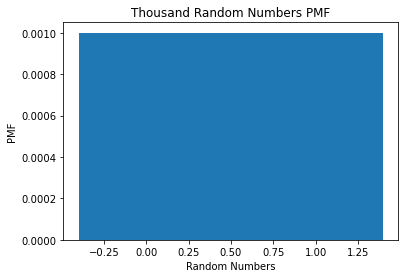

In [79]:
# Plot the PMF
thousandNumbers_pmf.bar()
randomNumbers_plot('PMF', 'Thousand Random Numbers PMF')

In [81]:
# CDF of a thousand random numbers
thousandNumbers_cdf = Cdf.from_seq(thousandNumbers)
thousandNumbers_cdf

,probs
0.000806,0.001
0.002034,0.002
0.002698,0.003
0.003855,0.004
0.003981,0.005
...,...
0.993847,0.996
0.993973,0.997
0.994390,0.998
0.996312,0.999


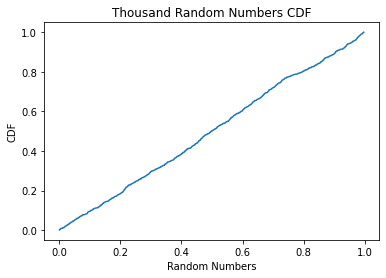

In [84]:
# Plot the CDF
thousandNumbers_cdf.plot()
randomNumbers_plot('CDF', 'Thousand Random Numbers CDF')

*Is the distribution uniform?*

Yes, the random numbers are uniform as the PMF shows the same probablity for each number and the CDF
shows a stright line with the random number being the same as the percentile.